In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
img = cv2.imread('input02.jpg')

In [3]:
rgb_img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

In [4]:
def display_img(img):
    fig = plt.figure(figsize = (12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img)

In [5]:
def display_palette(palette,colors):
    fig=plt.figure(figsize=(15, 15))
    rows = 16
    columns = 16
    if(colors > 256):
        rows = math.ceil(colors/16)
        columns = 16
    for i in range(colors):
        fig.add_subplot(rows, columns, i+1)
        plt.axis('off')
        plt.imshow([[palette[i]]])
    plt.show()

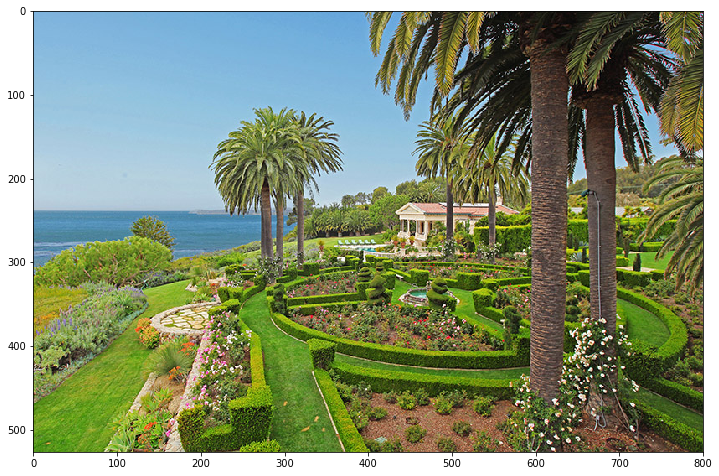

In [6]:
display_img(rgb_img)

In [7]:
colors = int(input("Enter the number of colors : "))

Enter the number of colors : 32


In [8]:
def PowerOfTwo(n): 
    depth = 0
    if (n == 0): 
        print("Not power of 2")
        return
    while (n != 1): 
        if (n % 2 != 0): 
            print("Not power of 2")
            return
        n = n // 2
        depth = depth + 1
    print("Power of ", depth)
    return depth

In [9]:
depth = PowerOfTwo(colors)

Power of  5


In [10]:
def color_quantize(img,array):
    r_avg = np.mean(array[:, 0])
    g_avg = np.mean(array[:, 1])
    b_avg = np.mean(array[:, 2])
    
    r_avg = int(round(r_avg))
    g_avg = int(round(g_avg))
    b_avg = int(round(b_avg))
    palette.append((r_avg, g_avg,b_avg))

    for data in array:
        rgb_img[data[3]][data[4]] = [r_avg, g_avg, b_avg]

In [11]:
def bucket_split(img, array, depth):
    if len(array) == 0:
        return

    if depth == 0:
        color_quantize(img,array)
        return

    r_range = np.max(array[:, 0]) - np.min(array[:, 0])
    g_range = np.max(array[:, 1]) - np.min(array[:, 1])
    b_range = np.max(array[:, 2]) - np.min(array[:, 2])

    highest_range = 0

    if g_range >= r_range and g_range >= b_range:
        highest_range = 1
    elif b_range >= r_range and b_range >= g_range:
        highest_range = 2
    elif r_range >= b_range and r_range >= g_range:
        highest_range = 0

    array = array[array[:, highest_range].argsort()]
    median = int((len(array) + 1) / 2)

    # split the array into two blocks
    bucket_split(img, array[0:median], depth - 1)
    bucket_split(img, array[median:], depth - 1)

In [12]:
palette = []
image_array = []
for ri, row in enumerate(rgb_img):
    for ci, color in enumerate(row):
        image_array.append([color[0], color[1], color[2], ri, ci])

In [13]:
image_array = np.array(image_array)

In [14]:
bucket_split(rgb_img, image_array,depth)

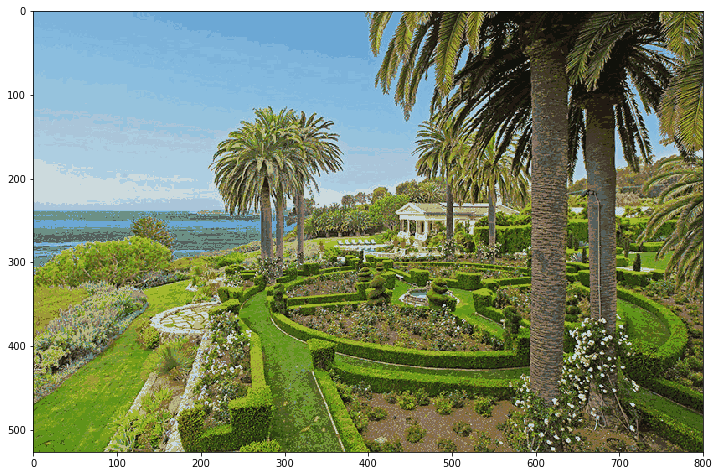

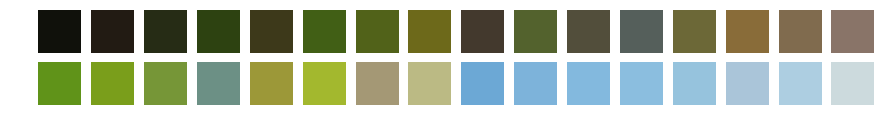

In [15]:
display_img(rgb_img)
display_palette(palette,colors)

In [16]:
actual_img = cv2.cvtColor(rgb_img,cv2.COLOR_RGB2BGR)

In [17]:
cv2.imwrite('OC32.jpg', actual_img) 

True